# DS-SF-27 | Codealong 08 | k-Nearest Neighbors

In [49]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [50]:
df = pd.read_csv(os.path.join('..', 'datasets', 'iris.csv'))

In [51]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [52]:
df.Species.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: Species, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185a9a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1186825d0>]], dtype=object)

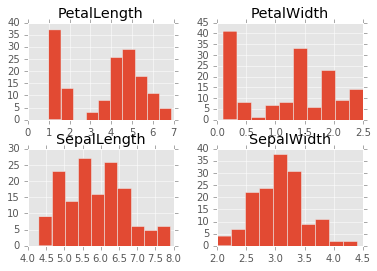

In [53]:
df.hist()

## Part A - Activity | Iris Dataset | Exploratory Data Analysis

In [54]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

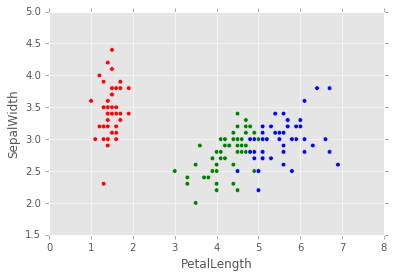

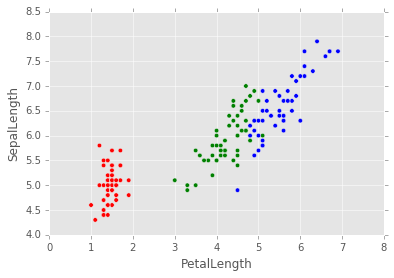

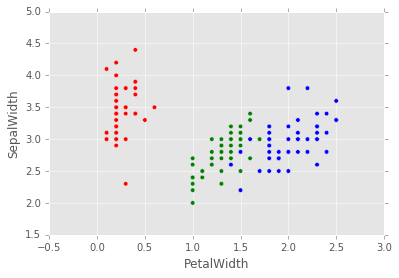

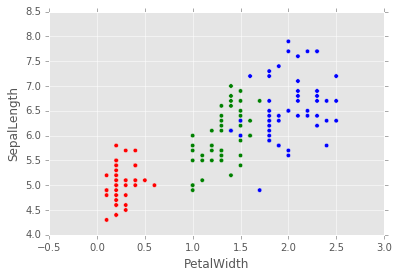

In [55]:
# TODO

df.plot(kind = 'scatter', x = 'PetalLength', y = 'SepalWidth', c = color)
df.plot(kind = 'scatter', x = 'PetalLength', y = 'SepalLength', c = color)
df.plot(kind = 'scatter', x = 'PetalWidth', y = 'SepalWidth', c = color)
df.plot(kind = 'scatter', x = 'PetalWidth', y = 'SepalLength', c = color)


## Part B - First hand-coded classifier

In [56]:
c = df.Species

In [57]:
def my_first_classifier(row):
    # TODO
    
    if row.PetalLength <2:
        return "Setosa"
    else:
        return "Versicolor"

In [58]:
c_hat = df.apply(my_first_classifier, axis = 1)

c_hat

0          Setosa
1          Setosa
2          Setosa
3          Setosa
4          Setosa
          ...    
145    Versicolor
146    Versicolor
147    Versicolor
148    Versicolor
149    Versicolor
dtype: object

In [59]:
c_hat.value_counts()

Versicolor    100
Setosa         50
dtype: int64

## Part C - Classification metrics

### Accuracy

In [60]:
# TODO

(c_hat == c).mean()

0.66666666666666663

In [61]:
pd.crosstab(c_hat, c)

Species,Setosa,Versicolor,Virginica
row_0,,,
Setosa,50,0,0
Versicolor,0,50,50


### Misclassification rate

In [62]:
# TODO

print (c_hat != c).mean()
print 1 - (c_hat == c).mean()

0.333333333333
0.333333333333


## Part D - Activity | Second hand-coded classifier

In [68]:
def my_second_classifier(row):
      if row.PetalLength < 2: 
            return "Setosa"
        elif row.PetalLength < 5:
               return "Versicolor"
        else: 
               return "Virginica"
    
    
    
 

IndentationError: unindent does not match any outer indentation level (<ipython-input-68-a9f5de0dd5ac>, line 4)

In [70]:
c_hat = df.apply(my_second_classifier, axis = 1)

In [71]:
(c_hat != c).sum()

8

In [72]:
(c_hat == c).mean()

0.94666666666666666

## Part E - k-Nearest Neighbors (k-NN)

### Feature matrix and label vector

In [73]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [74]:
X

array([[ 0.22222222,  0.625     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.41666667,  0.06779661,  0.04166667],
       [ 0.11111111,  0.5       ,  0.05084746,  0.04166667],
       [ 0.08333333,  0.45833333,  0.08474576,  0.04166667],
       [ 0.19444444,  0.66666667,  0.06779661,  0.04166667],
       [ 0.30555556,  0.79166667,  0.11864407,  0.125     ],
       [ 0.08333333,  0.58333333,  0.06779661,  0.08333333],
       [ 0.19444444,  0.58333333,  0.08474576,  0.04166667],
       [ 0.02777778,  0.375     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.45833333,  0.08474576,  0.        ],
       [ 0.30555556,  0.70833333,  0.08474576,  0.04166667],
       [ 0.13888889,  0.58333333,  0.10169492,  0.04166667],
       [ 0.13888889,  0.41666667,  0.06779661,  0.        ],
       [ 0.        ,  0.41666667,  0.01694915,  0.        ],
       [ 0.41666667,  0.83333333,  0.03389831,  0.04166667],
       [ 0.38888889,  1.        ,  0.08474576,  0.125     ],
       [ 0.30555556,  0.

In [75]:
c = df.Species

In [76]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

In [77]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(X, c)

In [78]:
c_hat = model.predict(X)

In [79]:
(c_hat != c).sum()

6

In [80]:
pd.DataFrame({'c': c, 'c_hat': c_hat})[c_hat != c]

,c,c_hat
70,Versicolor,Virginica
83,Versicolor,Virginica
106,Virginica,Versicolor
119,Virginica,Versicolor
133,Virginica,Versicolor
134,Virginica,Versicolor


You can measure the precision of your prediction either manually or with `.score()`

In [81]:
(c_hat == c).mean()

0.95999999999999996

In [82]:
model.score(X, c)

0.95999999999999996

# weights = 'uniform'

In [83]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(X, c).\
    score(X, c)

0.95999999999999996

# weights = 'distance'

In [84]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance').\
    fit(X, c).\
    score(X, c)

1.0

## Part F - What is the best value for `k`?

In [85]:
k = range(1, df.shape[0])

score_df = pd.DataFrame({'k': k})

score_df['model'] = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, c), axis = 1)

score_df['score'] = score_df.model.apply(lambda model: model.score(X, c))

In [86]:
score_df

,k,model,score
0,1,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.000000
1,2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.973333
2,3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.966667
3,4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.960000
4,5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.960000
...,...,...,...
144,145,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.626667
145,146,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.613333
146,147,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.580000
147,148,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.546667


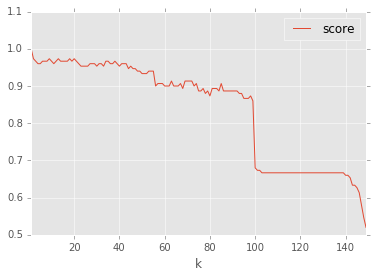

In [87]:
score_df.plot(x = 'k', y = 'score')

In [88]:
score_df[score_df.k.isin([99, 100])]

,k,model,score
98,99,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.86
99,100,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.68


In [89]:
c_hat_99 = score_df.loc[score_df.k == 99, 'model'].values[0].predict(X)
c_hat_100 = score_df.loc[score_df.k == 100, 'model'].values[0].predict(X)

pd.crosstab(c_hat_99, c, rownames = ['Hypothesized Class (k = 99)'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class (k = 99),,,
Setosa,50,0,0
Versicolor,0,43,14
Virginica,0,7,36


In [90]:
pd.crosstab(c_hat_100, c, rownames = ['Hypothesized Class (k = 100)'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class (k = 100),,,
Setosa,50,0,0
Versicolor,0,50,48
Virginica,0,0,2


## Part G - Validation

60% of the dataset to train the model; the rest to test the model

In [101]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()

In [102]:
train_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
...,...,...,...,...,...
141,6.9,3.1,5.1,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica


In [103]:
test_df = df.drop(train_df.index)

In [104]:
test_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
9,4.9,3.1,1.5,0.1,Setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,Virginica
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
145,6.7,3.0,5.2,2.3,Virginica


The error in the training set is less than the error is the test set

In [105]:
train_X = train_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

train_c = train_df.Species

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(train_X, train_c)

model.score(train_X, train_c)

0.96666666666666667

In [107]:
test_X = test_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

test_X = scaler.transform(text_X)

test_c = test_df.Species

model.score(test_X, test_c)

NameError: name 'text_X' is not defined

In [108]:
k = range(1, train_df.shape[0])

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_c), axis = 1)

score_df['train_score'] = models.apply(lambda model: model.score(train_X, train_c))
score_df['test_score'] = models.apply(lambda model: model.score(test_X, test_c))

NameError: global name 'test_c' is not defined

In [109]:
score_df

,k,train_score
0,1,1.000000
1,2,0.955556
2,3,0.955556
3,4,0.944444
4,5,0.966667
...,...,...
84,85,0.366667
85,86,0.366667
86,87,0.366667
87,88,0.366667


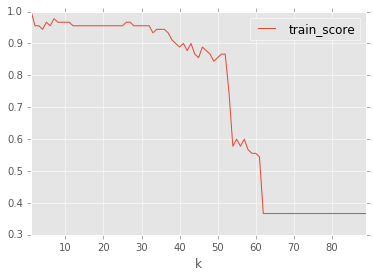

In [110]:
score_df.set_index('k').plot()

## Part H - Cross-Validation

In [111]:
train_df.shape

(90, 5)

In [112]:
train_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
...,...,...,...,...,...
141,6.9,3.1,5.1,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica


In [114]:
k_cv = 5 # 5-fold CV
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = cross_validation.KFold(train_df.shape[0], n_folds = k_cv)
)

gs.fit(train_X, train_c)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'weights': [score.parameters['weights'] for score in gs.grid_scores_],
    'score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

,k,score,weights
0,1,0.911111,uniform
1,1,0.911111,distance
2,2,0.888889,uniform
3,2,0.911111,distance
4,3,0.900000,uniform
...,...,...,...
137,69,0.500000,distance
138,70,0.055556,uniform
139,70,0.500000,distance
140,71,0.055556,uniform


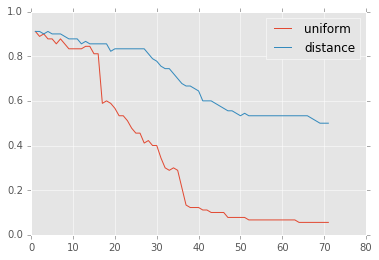

In [115]:
score_uniform_df = score_df[score_df.weights == 'uniform']
plt.plot(score_uniform_df.k, score_uniform_df.score, label = 'uniform')

score_distance_df = score_df[score_df.weights == 'distance']
plt.plot(score_distance_df.k, score_distance_df.score, label = 'distance')

plt.legend()

In [116]:
gs.best_score_

0.91111111111111109

In [117]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [118]:
gs.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [119]:
gs.score(train_X, train_c)

1.0

In [120]:
gs.score(test_X, test_c)

NameError: name 'test_c' is not defined

## Final model

In [ ]:
# TODO